In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.cluster import KMeans

In [2]:
orders=pd.read_csv('/content/List of Orders.csv')

In [3]:
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [4]:
orders.isnull().sum()

,0
Order ID,60
Order Date,60
CustomerName,60
State,60
City,60


In [5]:
orders.dropna(inplace=True)

In [6]:
orders.isnull().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
orders['State']=le1.fit_transform(orders['State'])
orders['City']=le2.fit_transform(orders['City'])



In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    int64 
 4   City          500 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 23.4+ KB


In [17]:
orders.shape

(500, 5)

In [18]:
x=orders.iloc[:,[3,4]].values

In [21]:
wcs =[]
for i in range(1,12):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcs.append(kmeans.inertia_)

In [22]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
y=kmeans.fit_predict(x)
print(y)


[4 1 4 3 5 4 3 0 5 2 1 0 4 2 0 4 3 2 4 1 4 3 5 4 3 3 3 2 1 0 4 2 0 4 3 3 3
 1 4 3 5 4 3 3 3 2 1 0 4 3 3 4 3 3 3 1 4 3 5 4 3 3 3 2 1 0 4 2 0 4 3 2 4 1
 4 3 5 4 3 3 3 2 1 3 3 2 3 3 3 3 3 3 4 3 5 4 3 0 5 3 3 3 3 3 3 4 3 3 3 1 4
 3 5 4 3 0 5 3 3 0 4 2 3 3 3 3 3 1 4 3 5 4 3 3 5 3 3 0 4 3 3 4 3 2 4 1 4 3
 3 3 3 3 5 2 1 3 3 2 0 4 3 3 4 1 4 3 5 4 3 3 5 2 1 0 4 3 3 3 3 2 4 3 3 3 5
 4 3 0 5 2 1 3 3 2 0 3 3 2 4 1 4 3 3 4 3 3 5 2 1 0 3 3 3 3 3 2 3 3 4 3 5 4
 3 3 3 3 3 0 4 2 0 3 3 2 4 1 3 3 5 4 3 3 3 3 1 0 4 2 0 4 3 2 4 1 4 3 3 3 3
 0 5 2 1 3 3 2 0 4 3 2 2 3 3 1 0 0 2 3 3 1 0 0 2 3 3 1 0 0 2 3 3 1 0 0 2 3
 3 1 0 0 2 3 3 4 4 4 4 4 4 4 4 4 4 4 0 2 3 3 1 0 0 2 3 4 3 3 5 2 1 0 3 3 3
 3 3 0 4 2 0 4 3 2 4 1 3 2 4 1 3 3 5 3 2 4 1 3 3 5 3 2 4 1 3 3 5 1 0 0 2 3
 3 1 0 1 0 0 2 3 3 1 4 4 4 4 3 1 4 4 4 4 3 1 4 4 4 4 3 1 4 4 4 4 4 3 5 4 3
 0 5 2 4 1 4 3 5 4 3 0 5 2 1 0 4 2 0 4 3 2 4 1 4 3 5 4 3 3 3 2 1 0 4 2 0 4
 3 3 3 1 4 3 5 4 3 3 3 2 1 0 4 3 3 4 3 3 3 1 4 3 5 4 3 3 3 4 1 4 3 5 4 3 0
 5 2 1 0 4 2 0 4 3 2 4 1 

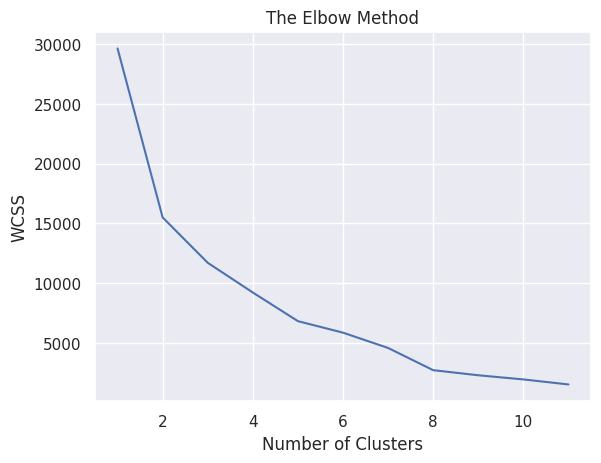

In [23]:
sns.set()
plt.plot(range(1,12),wcs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

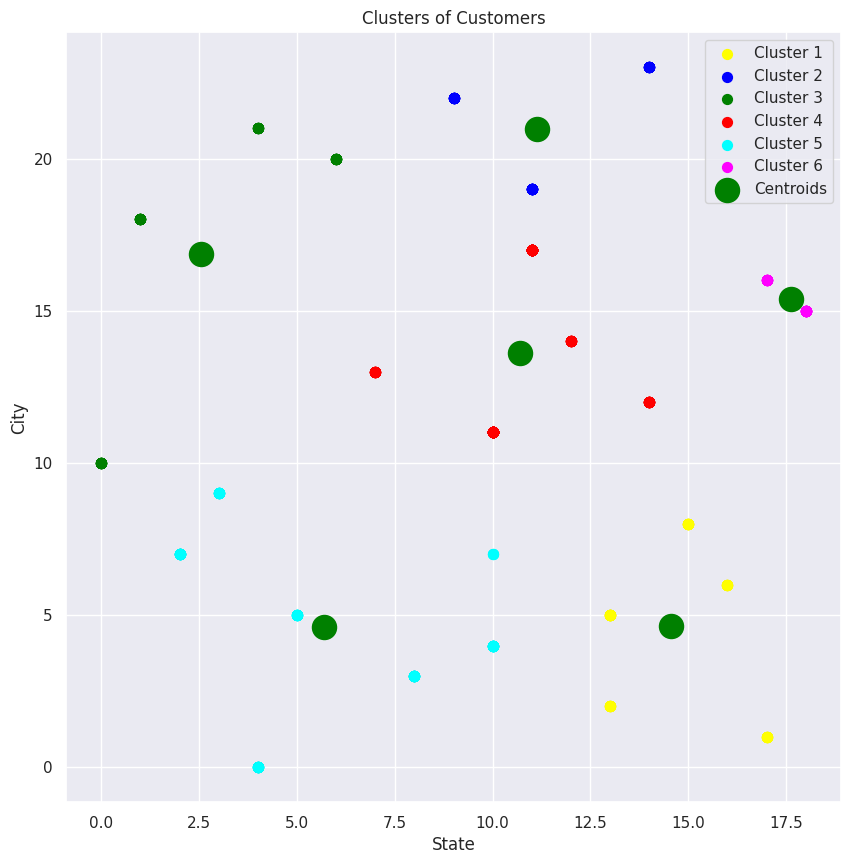

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(  x[y==0,0],x[y==0,1],s=50,c='yellow',label='Cluster 1')
plt.scatter(  x[y==1,0],x[y==1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(  x[y==2,0],x[y==2,1],s=50,c='green',label='Cluster 3')
plt.scatter(  x[y==3,0],x[y==3,1],s=50,c='red',label='Cluster 4')
plt.scatter(  x[y==4,0],x[y==4,1],s=50,c='cyan',label='Cluster 5')
plt.scatter(  x[y==5,0],x[y==5,1],s=50,c='magenta',label='Cluster 6')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('State')
plt.ylabel('City')
plt.legend()
plt.show()